<a href="https://colab.research.google.com/github/Izuho/computer-graphics/blob/main/9-20/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

import distutils
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
print('学習用写真 : ', x_train.shape, '\n学習用ラベル : ', y_train.shape, '\nテスト用写真 : ', x_test.shape, '\nテスト用ラベル : ', y_test.shape)

学習用写真 :  (60000, 28, 28) 
学習用ラベル :  (60000,) 
テスト用写真 :  (10000, 28, 28) 
テスト用ラベル :  (10000,)


sklearnでPCAをする時には1次元データに変換しておく

In [18]:
import numpy as np

x_train = x_train.reshape(-1, 28 * 28)

<BarContainer object of 784 artists>

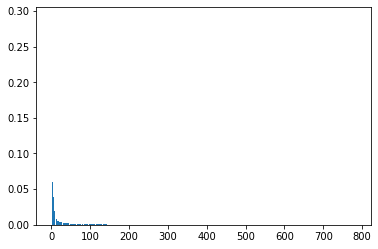

In [19]:
from sklearn.decomposition import PCA

# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=28*28)
pca.fit(x_train)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [20]:
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.29039 0.17755 0.06019 0.04957 0.03848 0.03461 0.02342 0.01905 0.0135
 0.01314 0.00993 0.00913 0.00766 0.0066  0.00608 0.0059  0.00552 0.00524
 0.00458 0.00456 0.00434 0.00407 0.00385 0.00373 0.00361 0.00351 0.00333
 0.00319 0.00308 0.00293 0.00276 0.00265 0.00264 0.00256 0.00246 0.00236
 0.0023  0.00226 0.00218 0.00209 0.002   0.00196 0.00195 0.00183 0.00175
 0.00172 0.00169 0.00164 0.00161 0.00155 0.00152 0.0015  0.00147 0.00143
 0.00138 0.00137 0.00131 0.00129 0.00127 0.00126 0.00121 0.0012  0.00118
 0.00116 0.00116 0.00112 0.00111 0.0011  0.00105 0.00105 0.00103 0.00101
 0.00098 0.00096 0.00094 0.00093 0.00093 0.0009  0.00089 0.00087 0.00085
 0.00084 0.00083 0.00081 0.00081 0.0008  0.00078 0.00077 0.00076 0.00075
 0.00075 0.00074 0.00073 0.00072 0.00071 0.0007  0.0007  0.00068 0.00067
 0.00066 0.00065 0.00064 0.00064 0.00063 0.00062 0.00062 0.00061 0.00059
 0.00059 0.00059 0.00058 0.00057 0.00056 0.00055 0.00055 0.00054 0.00054
 0.00054 0.00053 0.00052 0

上位から累積して80%になるように持ってくることが多い。この場合は27次元に圧縮するば良い。精度が出ないので60次元持ってきた。

In [33]:
# データの最初の2つの主成分だけを維持
N =60
pca = PCA(n_components=N)
pca.fit(x_train)

# 最初の２つの主成分に対して、データポイントを変換
x_pca = pca.transform(x_train)
print('Original shape: {}'.format(str(x_train.shape)))
print('Reduced shape: {}'.format(str(x_pca.shape)))

Original shape: (60000, 784)
Reduced shape: (60000, 60)


kernel_regulizerで正則化を行う。

In [38]:
# 単純な単一層のモデル
model = tf.keras.Sequential([
    tf.keras.layers.Dense(N, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6821 - accuracy: 0.7911 - val_loss: 0.4969 - val_accuracy: 0.8414
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4685 - accuracy: 0.8499 - val_loss: 0.4526 - val_accuracy: 0.8536
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4357 - accuracy: 0.8611 - val_loss: 0.4325 - val_accuracy: 0.8612
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4163 - accuracy: 0.8673 - val_loss: 0.4214 - val_accuracy: 0.8630
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4022 - accuracy: 0.8714 - val_loss: 0.4122 - val_accuracy: 0.8662
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3924 - accuracy: 0.8731 - val_loss: 0.4082 - val_accuracy: 0.8666
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3840 - accuracy: 0.8764 - val_loss: 0.4015 - val_accuracy:

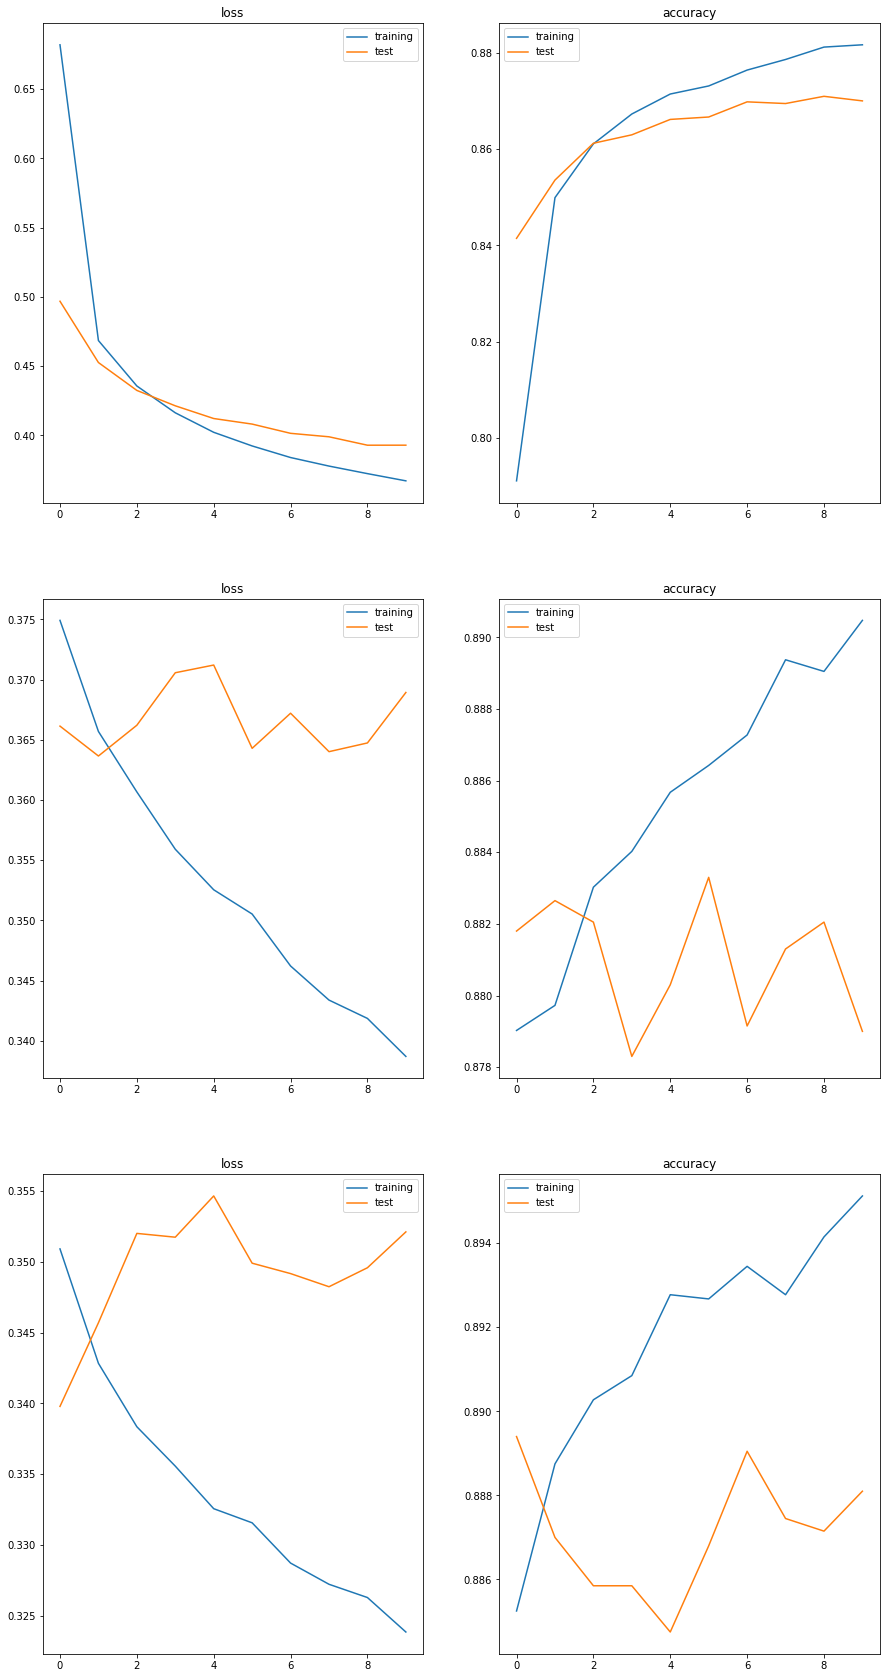

In [39]:
#KFoldのインポート
from sklearn.model_selection import KFold
 

K = 3
#KFoldの設定
kf = KFold(n_splits = K, shuffle = True, random_state = 1)
j = 0
plt.figure(figsize=(15, 30))  # グラフを表示するスペースを用意
 
#交差検証
for train, test in kf.split(x_pca):
    
    history = model.fit(x_pca[train],
                        y_train[train],
                        validation_data = (x_pca[test], y_train[test]), 
                        epochs = 10)

    metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

    for i in range(len(metrics)):
        j += 1

        metric = metrics[i]

        plt.subplot(3, 2, j)
        plt.title(metric)  # グラフのタイトルを表示
    
        plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
        plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す
    
        plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
        plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
        plt.legend()  # ラベルの表示
    
plt.show()  # グラフの表示